In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
# Might have to move this chunk down to split it into right and left shift once the layout is taken
para = input('Enter Sentence:')
para_words = para.split(' ')
char_freq = defaultdict(int)

for char in para:
    if char.isalpha() and char.isupper():
        char_freq['shift'] += 1
        char = char.lower()
    char_freq[char] += 1
char_freq

defaultdict(int,
            {'a': 2,
             's': 2,
             'f': 2,
             'd': 2,
             ' ': 2,
             'shift': 4,
             'j': 1,
             'k': 1,
             'l': 1,
             ';': 1})

In [3]:
with open('layout.txt', 'r') as file:
    st = file.readlines()
##############################################################
    if '{' in st[0]:
        st[0] = '{'
    else:
        st = st[1:]

    layout = eval("\n".join(st))

layout

{'row1': {'keys': '`1234567890-=',
  'positions': [(0, 0),
   (1, 0),
   (2, 0),
   (3, 0),
   (4, 0),
   (5, 0),
   (6, 0),
   (7, 0),
   (8, 0),
   (9, 0),
   (10, 0),
   (11, 0),
   (12, 0)]},
 'row2': {'keys': 'qwertyuiop[]\\',
  'positions': [(0.5, 1),
   (1.5, 1),
   (2.5, 1),
   (3.5, 1),
   (4.5, 1),
   (5.5, 1),
   (6.5, 1),
   (7.5, 1),
   (8.5, 1),
   (9.5, 1),
   (10.5, 1),
   (11.5, 1),
   (12.5, 1)]},
 'row3': {'keys': "asdfghjkl;'",
  'positions': [(0.75, 2),
   (1.75, 2),
   (2.75, 2),
   (3.75, 2),
   (4.75, 2),
   (5.75, 2),
   (6.75, 2),
   (7.75, 2),
   (8.75, 2),
   (9.75, 2),
   (10.75, 2)]},
 'row4': {'keys': 'zxcvbnm,./',
  'positions': [(1.25, 3),
   (2.25, 3),
   (3.25, 3),
   (4.25, 3),
   (5.25, 3),
   (6.25, 3),
   (7.25, 3),
   (8.25, 3),
   (9.25, 3),
   (10.25, 3)]},
 'special_keys': {'Shift_L': (0, 3),
  'Shift_R': (11.25, 3),
  'Space': (3.5, 4),
  'Backspace': (13, 0),
  'Tab': (0, 1),
  'CapsLock': (0, 2),
  'Enter': (12, 2)}}

In [4]:
def get_key_position(key):
    for row in layout.values():
        if 'keys' in row and key in row['keys']:
            index = row['keys'].index(key)
            return row['positions'][index]
    return layout['special_keys'].get(key)

In [5]:
print(get_key_position('a'))

(0.75, 2)


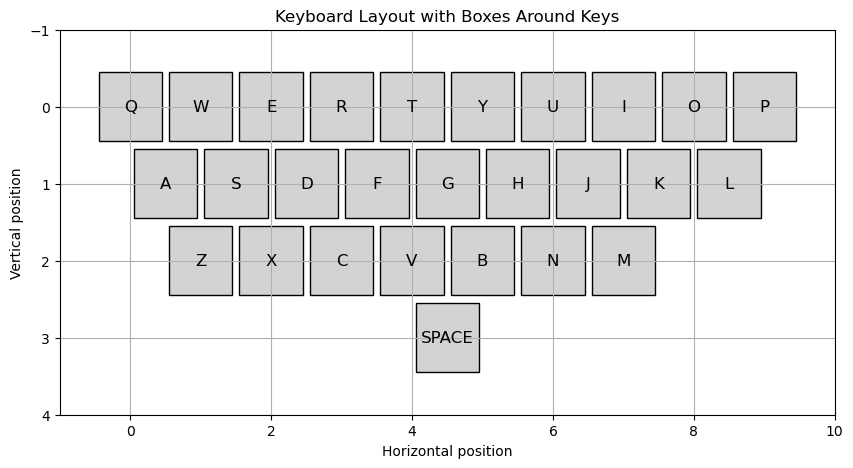

In [6]:
# Mock function to simulate key positions (replace with actual key position function)
def get_key_position(key):
    qwerty_layout = {
        'Q': (0, 0), 'W': (1, 0), 'E': (2, 0), 'R': (3, 0), 'T': (4, 0), 'Y': (5, 0), 'U': (6, 0), 'I': (7, 0), 'O': (8, 0), 'P': (9, 0),
        'A': (0.5, 1), 'S': (1.5, 1), 'D': (2.5, 1), 'F': (3.5, 1), 'G': (4.5, 1), 'H': (5.5, 1), 'J': (6.5, 1), 'K': (7.5, 1), 'L': (8.5, 1),
        'Z': (1, 2), 'X': (2, 2), 'C': (3, 2), 'V': (4, 2), 'B': (5, 2), 'N': (6, 2), 'M': (7, 2),
        'SPACE': (4.5, 3)
    }
    return qwerty_layout.get(key.upper(), (None, None))

# List of keys to plot
keys = ['Q', 'W', 'E', 'R', 'T', 'Y', 'U', 'I', 'O', 'P', 'A', 'S', 'D', 'F', 'G', 'H', 'J', 'K', 'L', 'Z', 'X', 'C', 'V', 'B', 'N', 'M', 'SPACE']

# Create a plot
plt.figure(figsize=(10, 5))

# Size of each key box
key_width = 0.9
key_height = 0.9

# Plot each key with a surrounding box
for key in keys:
    x, y = get_key_position(key)
    if x is not None and y is not None:
        # Draw the box around the key
        rect = plt.Rectangle((x - key_width / 2, y - key_height / 2), key_width, key_height, 
                             edgecolor='black', facecolor='lightgray')
        plt.gca().add_patch(rect)
        
        # Scatter the key in the middle of the box and annotate it
        # plt.scatter(x, y, color='blue')
        plt.text(x, y, key, fontsize=12, ha='center', va='center')

# Set plot limits and labels
plt.xlim(-1, 10)
plt.ylim(-1, 4)
plt.title('Keyboard Layout with Boxes Around Keys')
plt.xlabel('Horizontal position')
plt.ylabel('Vertical position')
plt.gca().invert_yaxis()  # Invert y-axis to match the typical keyboard layout view
plt.grid(True)
plt.show()
